In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('datos.csv')
data

,x_1,x_2,y
0,-1.851357e+14,3.565394e+13,0
1,5.715585e+14,-8.484241e+13,1
2,5.175931e+14,-1.231538e+14,1
3,5.966117e+14,-1.778714e+14,1
4,4.207345e+14,-1.175593e+14,1
...,...,...,...
16379,7.025930e+14,-1.572575e+14,0
16380,-8.740727e+13,7.636715e+13,0
16381,4.867707e+14,-1.507269e+14,1
16382,6.819048e+14,-1.245187e+14,1


In [3]:
from sklearn.model_selection import train_test_split

X = data.values[:,:2]
y = data.values[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

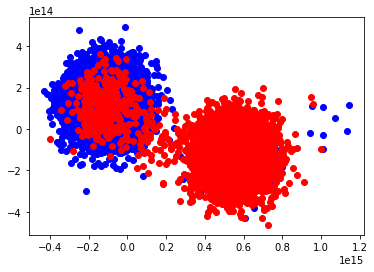

In [4]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="blue", label="Estado 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="red", label="Estado 1")

In [5]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler(quantile_range=(0.25,0.75)).fit(X)
X = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

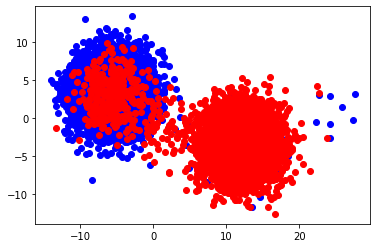

In [6]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="blue", label="Estado 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="red", label="Estado 1")

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':[i for i in range(1,500,10)], 'max_depth':[i for i in range(1,10)]}
rfc = RandomForestClassifier(random_state=0)
clf = GridSearchCV(rfc, parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'max_depth': 4, 'n_estimators': 11}


In [13]:
estimators = clf.best_params_['n_estimators']
depth = clf.best_params_['max_depth']
clf = RandomForestClassifier(max_depth=depth, random_state=0, n_estimators=estimators)
clf.fit(X_train, y_train)
print('Score is: ',clf.score(X_test,y_test))

Score is:  0.9532139951179821


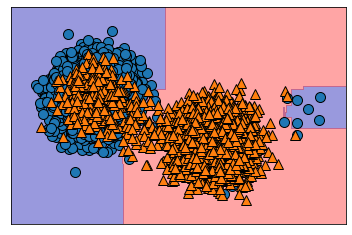

In [20]:
import mglearn
%matplotlib inline
mglearn.plots.plot_2d_separator(clf,X_train,fill=True,alpha=.4)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)